<a href="https://colab.research.google.com/github/monaja/dl_oct_cw/blob/feature/model_with_dropout(_15_layers_%26_30_do_%26_150_epochs_trial_32_60_20_20_lab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from glob import glob
import matplotlib.pyplot as plt

In [66]:
print("GPU Available:", tf.test.is_gpu_available())
print("TensorFlow Version:", tf.__version__)
print("GPU Device Name:", tf.config.experimental.list_physical_devices('GPU'))

GPU Available: True
TensorFlow Version: 2.18.0
GPU Device Name: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [67]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#             tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
#     except RuntimeError as e:
#         print(e)

# print("Now using:", tf.config.list_physical_devices('GPU'))

In [68]:
# from tensorflow.keras.mixed_precision import set_global_policy
# set_global_policy('mixed_float16')

In [69]:
# OCT images of 1024 x 1024 pixels with 1 channel
IMG_ROWS=224; IMG_COLS=224; IMG_CHANNELS=1
IMAGE_SIZE = [IMG_ROWS, IMG_COLS]

In [70]:
WHICH_MODEL = 'DenseNet121'

if WHICH_MODEL == 'VGG16':
    from keras.applications.vgg16 import VGG16
    from keras.applications.vgg16 import preprocess_input

    # for RGB channel use [3], for black and white use one channel [1], and IMAGE_SIZE + [3] = [224, 224, 3]
    orig_model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
    LEARN_RATE = 0.0001
    OCT_MODEL_NAME = 'VGG16_oct_minipigs.h5'

elif WHICH_MODEL == 'VGG19':
    from keras.applications.vgg19 import VGG19
    from keras.applications.vgg19 import preprocess_input

    # for RGB channel use [3], for black and white use one channel [1]
    orig_model = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
    LEARN_RATE = 0.0001
    OCT_MODEL_NAME = 'VGG19_oct_minipigs.h5'

elif WHICH_MODEL == 'ResNet50':
    from keras.applications.resnet50 import ResNet50
    from keras.applications.resnet50 import preprocess_input

    orig_model = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
    LEARN_RATE = 0.001
    OCT_MODEL_NAME = 'ResNet50_oct_minipigs.h5'

elif WHICH_MODEL == 'InceptionV3':
    from keras.applications.inception_v3 import InceptionV3
    from keras.applications.inception_v3 import preprocess_input

    orig_model = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
    LEARN_RATE = 0.0001
    OCT_MODEL_NAME = 'InceptionV3_oct_minipigs.h5'

elif WHICH_MODEL == 'DenseNet121':
    from keras.applications.densenet import DenseNet121
    from keras.applications.densenet import preprocess_input
    orig_model = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
    LEARN_RATE = 0.0001
    OCT_MODEL_NAME = 'DenseNet121_oct_minipigs.h5'

In [71]:
BATCH_SIZE = 32

EPOCHS = 150

In [72]:
# # path to TRAINING dataset of the OCT images
# TRAIN_PATH = '../PigData_PP/training'

# # path to VALIDATE dataset of the OCT images
# VALID_PATH = '../PigData_PP/val'

# # path to TESTING dataset of the OCT images
# TEST_PATH = '../PigData_PP/test'

# DATASET = 'Minipigs'

# CLASS_MODE = 'categorical'   # binary, categorical

# NUMBER_OF_CLASSES = 5


In [73]:
# from google.colab import drive
# drive.mount('/content/drive')

In [74]:
MAIN_PATH = '/content/drive/MyDrive/split_dataaset_60_20_20'

In [75]:
# path to TRAINING dataset of the OCT images
TRAIN_PATH = MAIN_PATH + '/train'

# path to VALIDATE dataset of the OCT images
VALID_PATH = MAIN_PATH + '/val'

# path to TESTING dataset of the OCT images
TEST_PATH = MAIN_PATH + '/test'

DATASET = 'Minipigs'

CLASS_MODE = 'categorical'   # binary, categorical

NUMBER_OF_CLASSES = 5


In [76]:

adam = Adam(learning_rate=LEARN_RATE)
#adam = Adam(learning_rate=LEARN_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam', decay=LEARN_RATE/EPOCHS)

#sgd = SGD(learning_rate=LEARN_RATE)

OPTIMISATION = adam  # SGD

# no need to train the weights again
for layer in orig_model.layers[:-15]:
    layer.trainable = False

In [77]:
# to retrieve the number of classes
folders = glob(TRAIN_PATH + '/*')

In [78]:
# more layers could be added to the model
x = Flatten()(orig_model.output)
x = Dropout(0.3)(x)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=orig_model.input, outputs=prediction)

In [79]:
# view the structure of the model
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_6          │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_6[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_7          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_7[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,288,389 (27.80 MB)

 Trainable params: 579,013 (2.21 MB)

 Non-trainable params: 6,709,376 (25.59 MB)

In [80]:
# tell the model what cost and optimisation method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer=OPTIMISATION,
    metrics=['accuracy']
)

In [81]:
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=350, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
    channel_shift_range=10., horizontal_flip=True, fill_mode='constant'
)

In [82]:
training_set = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_ROWS, IMG_COLS),
    batch_size=BATCH_SIZE,
#    seed=42,
#    color_mode=COLOUR_MODE,
    class_mode=CLASS_MODE
)

Found 2220 images belonging to 5 classes.


In [83]:
valid_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=350, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
    channel_shift_range=10., horizontal_flip=True, fill_mode='constant'
)

In [84]:
valid_set = valid_datagen.flow_from_directory(
    VALID_PATH,
    target_size=(IMG_ROWS, IMG_COLS),
    batch_size=BATCH_SIZE,
#    seed=42,
#    color_mode=COLOUR_MODE,
    class_mode=CLASS_MODE
)

Found 740 images belonging to 5 classes.


In [85]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_set = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_ROWS, IMG_COLS),
    batch_size=BATCH_SIZE,
#    seed=42,
#    color_mode=COLOUR_MODE,
    class_mode=CLASS_MODE
)

Found 740 images belonging to 5 classes.


In [86]:
# fit the model
history = model.fit(
    training_set,
    validation_data=valid_set,
    epochs=EPOCHS,
    steps_per_epoch=len(training_set),
#    validation_split=0.1
    validation_steps=len(valid_set)
)

#time taken: 3 hours

Epoch 1/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 1054s 15s/step - accuracy: 0.2999 - loss: 2.3962 - val_accuracy: 0.5757 - val_loss: 1.1957
Epoch 2/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.5333 - loss: 1.3082 - val_accuracy: 0.6446 - val_loss: 0.9045
Epoch 3/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6206 - loss: 1.0659 - val_accuracy: 0.7041 - val_loss: 0.8164
Epoch 4/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6294 - loss: 1.0294 - val_accuracy: 0.7203 - val_loss: 0.7568
Epoch 5/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6579 - loss: 1.0027 - val_accuracy: 0.7351 - val_loss: 0.7958
Epoch 6/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.6809 - loss: 0.9851 - val_accuracy: 0.7527 - val_loss: 0.6808
Epoch 7/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.7416 - loss: 0.7836 - val_accuracy: 0.7432 - val_loss: 0.6266
Epoch 8/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.7495 - loss: 0.7217 - val_accuracy: 

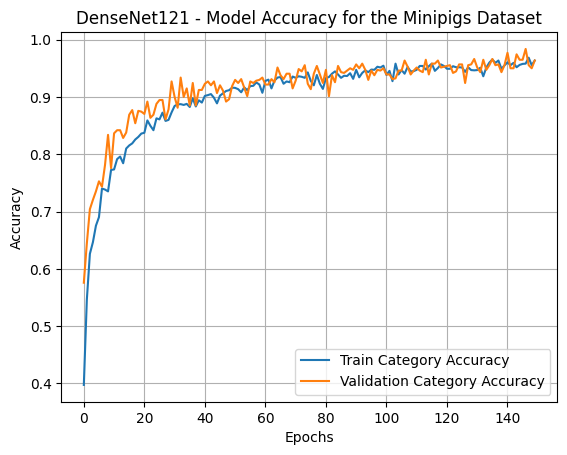

In [87]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
acc_title = "{} - Model Accuracy for the {} Dataset".format(WHICH_MODEL, DATASET)
plt.title(acc_title)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid(True)
plt.legend(['Train Category Accuracy', 'Validation Category Accuracy'], loc='lower right')
plt.show()

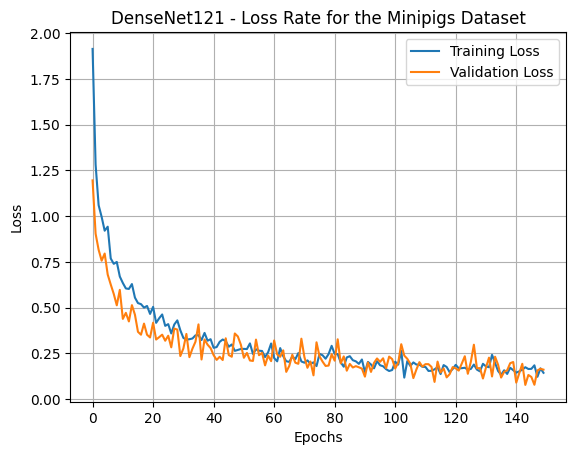

In [88]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
loss_title = "{} - Loss Rate for the {} Dataset".format(WHICH_MODEL, DATASET)
plt.title(loss_title)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid(True)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [89]:
train_loss, train_acc = model.evaluate(training_set, steps=16)
valid_loss, valid_acc = model.evaluate(valid_set, steps=16)

print('\nLearn Rate =', LEARN_RATE, ', Epochs =', EPOCHS, ', Training Folder =', TRAIN_PATH)

print('Validation Folder =', VALID_PATH, ', Test Folder =', TEST_PATH)

print('\nTraining: %.3f, Validation: %.3f' % (train_acc, valid_acc))

print('\nThe processing of Convolutional Neural Networks with Transfer Learning for', WHICH_MODEL, 'succeed.\n')

16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9563 - loss: 0.0958
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9632 - loss: 0.1536

Learn Rate = 0.0001 , Epochs = 150 , Training Folder = /content/drive/MyDrive/split_dataaset_60_20_20/train
Validation Folder = /content/drive/MyDrive/split_dataaset_60_20_20/val , Test Folder = /content/drive/MyDrive/split_dataaset_60_20_20/test

Training: 0.963, Validation: 0.961

The processing of Convolutional Neural Networks with Transfer Learning for DenseNet121 succeed.



In [90]:
results = model.evaluate(test_set, steps=16)
print("\nTest loss and accuracy are:", results)

16/16 ━━━━━━━━━━━━━━━━━━━━ 411s 26s/step - accuracy: 0.9132 - loss: 0.3857

Test loss and accuracy are: [0.44669392704963684, 0.912109375]


In [91]:
model.save('model_with_dropout(_15_layers_&_30_do_&_150_epochs_trial_32_60_20_20).h5')

In [92]:
#!pip install scikit-learn
#!pip install seaborn

In [93]:
cnn_predictions = model.predict(test_set)
print('\nPredictions:\n')
print(cnn_predictions)

cnn_predictions_max = cnn_predictions.argmax(axis=1)
print('\nPredictions argmax(axis=1):\n')
print(cnn_predictions_max)

print(test_set.labels)

print('\nTesting execution ended.\n')


24/24 ━━━━━━━━━━━━━━━━━━━━ 195s 8s/step

Predictions:

[[9.9993789e-01 4.6708557e-08 6.2087311e-05 1.2154933e-10 4.8644327e-15]
 [3.6987358e-09 1.1136308e-04 9.9988830e-01 3.1807198e-07 8.7399350e-15]
 [3.9985184e-20 2.0301831e-10 6.8117217e-08 9.9937576e-01 6.2419416e-04]
 ...
 [1.2800535e-12 8.3317963e-07 4.5439582e-02 9.5455962e-01 1.5819024e-10]
 [3.5361637e-15 1.0000000e+00 4.6058499e-10 2.7462132e-16 6.0355926e-19]
 [2.6737401e-10 2.9081831e-04 9.9970919e-01 8.5788336e-09 2.1164076e-16]]

Predictions argmax(axis=1):

[0 2 3 0 0 4 1 0 0 1 3 2 3 1 3 1 0 2 3 3 0 0 2 3 2 1 3 2 2 2 4 3 2 1 0 2 3
 4 0 0 4 2 2 4 1 4 1 2 0 3 2 2 4 1 0 0 1 2 4 0 4 0 2 0 2 4 2 2 1 4 0 0 3 4
 2 4 0 1 3 2 1 1 1 4 4 3 0 2 0 4 0 4 2 0 1 1 3 0 1 2 1 2 0 4 1 3 1 2 1 3 4
 3 0 0 0 2 2 0 3 3 3 0 1 4 4 0 1 0 2 3 1 3 3 3 2 3 2 1 1 4 4 2 3 2 1 2 3 1
 2 3 4 0 4 1 4 2 4 2 2 2 3 2 3 3 1 2 0 1 4 2 0 0 0 0 2 2 2 0 3 3 3 4 4 2 2
 4 1 4 1 1 3 4 3 4 1 3 4 1 2 0 3 4 2 0 2 4 0 3 4 4 1 0 3 1 3 0 3 1 3 0 0 1
 1 3 3 3 3 0 3 2 2 4 

In [94]:

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

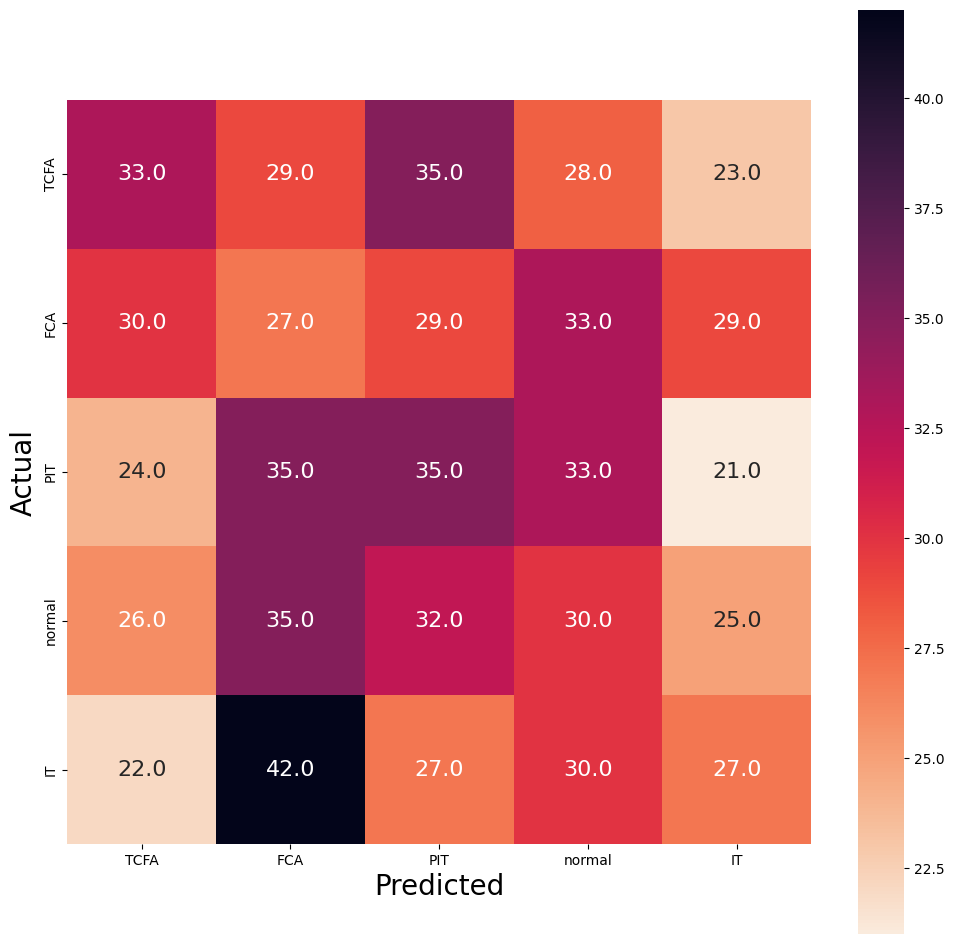

In [95]:


label = ['TCFA', 'FCA', 'PIT', 'normal', 'IT']
#Ypred = np.argmax(cnn_predictions, axis=1)
#Ytrue = np.argmax(test_set.labels, axis=0)

cm = confusion_matrix(test_set.labels, cnn_predictions_max)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()